<a href="https://colab.research.google.com/github/zanzivyr/game-of-life/blob/main/Game_of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game of Life

In the Game of Life, a two-dimensional grid of cells is used to simulate the evolution of a population of cells over time. Each cell can be in one of two states: alive or dead. The state of each cell at a given time step is determined by the state of its neighbors in the previous time step, according to the following rules:

- Any live cell with two or three live neighbors stays alive.
- Any live cell with fewer than two live neighbors dies (underpopulation).
- Any live cell with more than three live neighbors dies (overpopulation).
- Any dead cell with exactly three live neighbors becomes alive (reproduction).

The Game of Life is often used as a simple model for studying the behavior of complex systems and can exhibit a wide range of interesting and complex behaviors. It is also a popular subject for hobbyists and computer scientists to implement and play with.

# ChatGPT

I wrote this program with the help of ChatGPT. It's in part to help explore the limits of this AI. On the other hand I'm attempting to learn how to incorporate AI into my workflow and still produce something useful.

ChatGPT is helpful to get the scaffolding of things down without having to spend too much time searching. So, you'll find that the summary of Game of Life (above) is written by ChatGPT and the code for the displays are also. However, I kept writing the rules of the game myself -- though that is not very difficult.

https://chat.openai.com/chat

# Setup

### Import Libraries

In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from IPython.display import clear_output

### Set up basic Gridworld

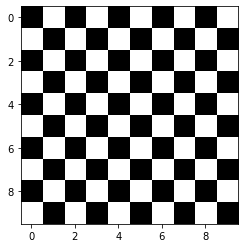

In [ ]:
# create an empty 10x10 array of zeros (black)
grid = np.zeros((10,10))

# set every other square to 1 (white)
grid[::2,::2] = 1
grid[1::2,1::2] = 1

# plot the grid using imshow
plt.imshow(grid, cmap='binary', interpolation='nearest')
plt.show()

### Modify squares for setting a population

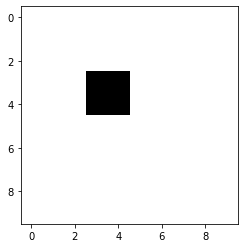

In [ ]:
# create an empty 10x10 array of zeros (white)
grid = np.zeros((10,10))

# set a 2x2 square to 1 (black)
grid[3:5,3:5] = 1

# plot the grid using imshow
plt.imshow(grid, cmap='binary', interpolation='nearest')
plt.show()

### Initialize a random population in Gridworld

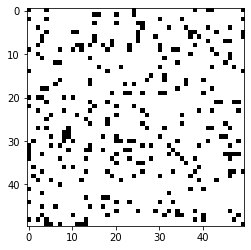

In [ ]:
# create an empty n x n array of zeros (white)
max = 50
grid = np.zeros((max,max))

# initialize a random population (alive = 1; black)
pop = 300
for i in range(pop):
    # generate random row and column indices
    row = random.randint(0, max-1)
    col = random.randint(0, max-1)
    
    # set the square at the random indices to 1 (black)
    grid[row, col] = 1

# plot the grid using imshow
plt.imshow(grid, cmap='binary', interpolation='nearest')
plt.show()

# Play Game of Life

Here we'll run Game of Life in a matplotlib plot so that it can be shown in Google Colab. Afterwards we'll write Tkinter code to run natively on the desktop and be smoother animation.

### Rules of Game of Life

- Any live cell with two or three live neighbors stays alive.
- Any live cell with fewer than two live neighbors dies (underpopulation).
- Any live cell with more than three live neighbors dies (overpopulation).
- Any dead cell with exactly three live neighbors becomes alive (reproduction).

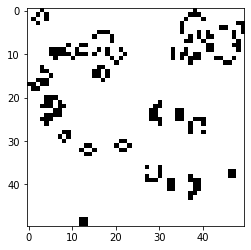

In [ ]:
# plot the grid using imshow
plt.imshow(grid, cmap='binary', interpolation='nearest')
plt.show()

cycles = 50
for i in range(cycles):
  # pause the plot for 0.5 seconds
  plt.pause(0.2)

  # update the output
  update = np.zeros((
      grid.shape[0],
      grid.shape[1]
  ))

  for row in range(grid.shape[0]):
    for col in range(grid.shape[1]):
      state = grid[row,col]
      count = 0

      # Top Row
      if(row-1 > 0    and col-1 > 0    and grid[row-1,col-1] == 1): count+=1
      if(row-1 > 0                     and grid[row-1,col  ] == 1): count+=1
      if(row-1 > 0    and col+1 < max  and grid[row-1,col+1] == 1): count+=1

      # Current Row
      if(                 col-1 > 0    and grid[row  ,col-1] == 1): count+=1
      # This
      if(                 col+1 < max  and grid[row  ,col+1] == 1): count+=1

      # Bottom Row
      if(row+1 < max  and col-1 > 0    and grid[row+1,col-1] == 1): count+=1
      if(row+1 < max                   and grid[row+1,col  ] == 1): count+=1
      if(row+1 < max  and col+1 < max  and grid[row+1,col+1] == 1): count+=1

      # Live or Die
      if(state == 1 and (count > 3 or count < 2)): state = 0
      elif(state == 0 and count == 3): state = 1
      update[row,col] = state

  # Update the board
  grid = update

  # plot the grid using imshow
  clear_output(wait=True)
  plt.imshow(grid, cmap='binary', interpolation='nearest')
  plt.show()

# Tkinter for Display

In [ ]:
import tkinter as tk

# Create the main window
root = tk.Tk()

# Create a canvas to hold the squares
size = 200
canvas = tk.Canvas(root, width=size, height=size)
canvas.pack()

# Create a grid of squares
max = 10
unit = size / max
for i in range(max):
    for j in range(max):
        # Determine the color of the square
        if (i + j) % 2 == 0:
            color = "white"
        else:
            color = "black"
        # Draw the square on the canvas
        x1 = i * unit
        y1 = j * unit
        x2 = x1 + unit
        y2 = y1 + unit
        canvas.create_rectangle(x1, y1, x2, y2, fill=color)

# Run the main loop
root.mainloop()

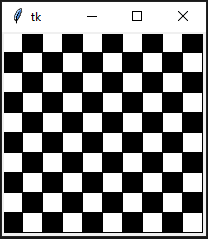

From here we can rewrite the code to use tkinter as the display function.

In [ ]:
import tkinter as tk
import numpy as np
import time
import random

# Create the main window
root = tk.Tk()

# Create a canvas to hold the squares
size = 200
canvas = tk.Canvas(root, width=size, height=size)
canvas.pack()

# Create a grid of squares
max = 10
unit = size / max
grid = np.zeros((max,max))

# Initialization
pop = int(0.45 * max * max)
for i in range(pop):
    # generate random row and column indices
    row = random.randint(0, max-1)
    col = random.randint(0, max-1)
    
    # set the square at the random indices to 1 (black)
    grid[row, col] = 1

# Define a function to update the canvas
def update_canvas():
    global grid

    # Update the output
    update = np.zeros((max,max))

    for row in range(max):
        for col in range(max):
            state = grid[row,col]
            count = 0

            # Top Row
            if(row-1 > 0    and col-1 > 0    and grid[row-1,col-1] == 1): count+=1
            if(row-1 > 0                     and grid[row-1,col  ] == 1): count+=1
            if(row-1 > 0    and col+1 < max  and grid[row-1,col+1] == 1): count+=1

            # Current Row
            if(                 col-1 > 0    and grid[row  ,col-1] == 1): count+=1
            # This
            if(                 col+1 < max  and grid[row  ,col+1] == 1): count+=1

            # Bottom Row
            if(row+1 < max  and col-1 > 0    and grid[row+1,col-1] == 1): count+=1
            if(row+1 < max                   and grid[row+1,col  ] == 1): count+=1
            if(row+1 < max  and col+1 < max  and grid[row+1,col+1] == 1): count+=1

            # Live or Die
            if(state == 1 and (count > 3 or count < 2)): state = 0
            elif(state == 0 and count == 3): state = 1
            update[row,col] = state

            if update[row,col] == 0:
                color = "white"
            else:
                color = "black"

            # Draw the square on the canvas
            x1 = row * unit
            y1 = col * unit
            x2 = x1 + unit
            y2 = y1 + unit
            canvas.create_rectangle(x1, y1, x2, y2, fill=color)

    # Update the board
    grid = update

    # Schedule the next update
    root.after(200, update_canvas)

# Schedule the first update
root.after(200, update_canvas)

# Run the main loop
root.mainloop()

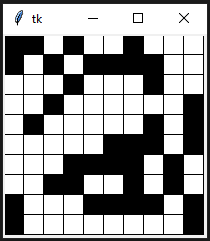

## Optimize

In [ ]:
import tkinter as tk
import numpy as np
import random

# Create the main window
root = tk.Tk()

# Create a canvas to hold the squares
size = 200
canvas = tk.Canvas(root, width=size, height=size)
canvas.pack()

# Create a grid of squares
max = 40
unit = int(size / max)
grid = np.zeros((max,max))

# Initialization
pop = int(0.45 * max * max)
for i in range(pop):
    # generate random row and column indices
    row = random.randint(0, max-1)
    col = random.randint(0, max-1)
    
    # set the square at the random indices to 1 (black)
    grid[row, col] = 1

# Create a PhotoImage object with a white and a black pixel
white = tk.PhotoImage(width=unit, height=unit)
white.put("#ffffff", (0, 0))
white = white.zoom(unit, unit)

black = tk.PhotoImage(width=unit, height=unit)
black.put("#000000", (0, 0))
black = black.zoom(unit, unit)

# Define a function to update the canvas
def update_canvas():
    global grid

    # Update the output
    update = np.zeros((max,max))

    for row in range(max):
        for col in range(max):
            state = grid[row,col]
            count = 0

            # Top Row
            if(row-1 > 0    and col-1 > 0    and grid[row-1,col-1] == 1): count+=1
            if(row-1 > 0                     and grid[row-1,col  ] == 1): count+=1
            if(row-1 > 0    and col+1 < max  and grid[row-1,col+1] == 1): count+=1

            # Current Row
            if(                 col-1 > 0    and grid[row  ,col-1] == 1): count+=1
            # This
            if(                 col+1 < max  and grid[row  ,col+1] == 1): count+=1

            # Bottom Row
            if(row+1 < max  and col-1 > 0    and grid[row+1,col-1] == 1): count+=1
            if(row+1 < max                   and grid[row+1,col  ] == 1): count+=1
            if(row+1 < max  and col+1 < max  and grid[row+1,col+1] == 1): count+=1

            # Live or Die
            if(state == 1 and (count > 3 or count < 2)): state = 0
            elif(state == 0 and count == 3): state = 1
            update[row,col] = state

            if update[row,col] == 0:
                image = white
            else:
                image = black

            # Draw the square on the canvas
            x1 = row * unit
            y1 = col * unit

            if(grid[row,col] != update[row,col]):
                canvas.create_image(x1, y1, image=image, anchor=tk.NW)

    # Update the board
    grid = update

    # Schedule the next update
    root.after(250, lambda: root.after_idle(update_canvas))

# Schedule the first update
root.after(250, lambda: root.after_idle(update_canvas))

# Run the main loop
root.mainloop()

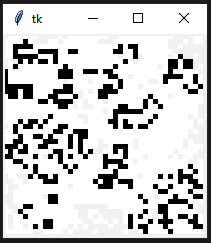

# Switch to C++

This was running too slow. So I switched to C++ using the SFML graphics library.

Using ChatGPT, I rewrote the above code to: https://github.com/zanzivyr/game-of-life/blob/main/SFML%20Learning.cpp


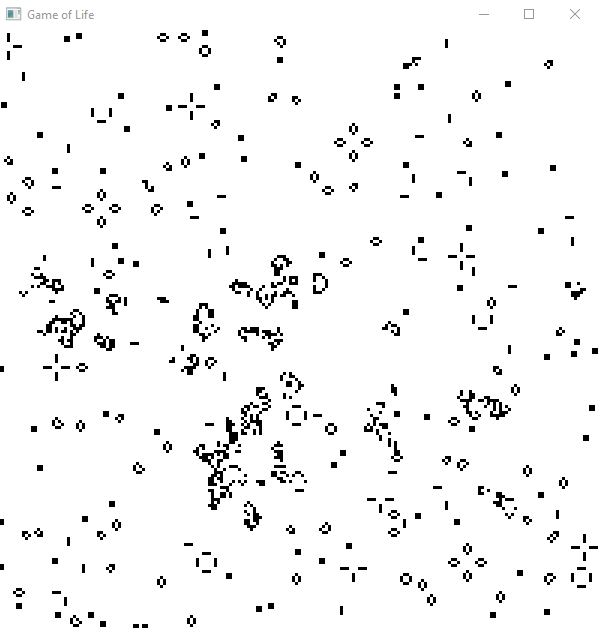